In [22]:
import pandas as pd
import joblib
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the LightGBM model
model = joblib.load('../lightgbm_model.joblib')

# Load the test dataset
X_test = pd.read_csv('../Dataset/xtest.csv')

c:\Users\youss\anaconda3\envs\health_senior\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.3.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [120]:
X_test

,mean_HR_sleep,HR_var_sleep,mean_RR_sleep,RR_var_sleep,WASO_sleep,SOL_sleep,TIB_sleep,TST_sleep,SE_sleep,Heart Rate
0,47.571685,5.221938,14.387097,1.413189,0.0,34.0,557.0,9.0,1.615799,53.0
1,55.688091,2.593529,14.155009,1.429723,9.0,18.0,538.0,444.0,82.527881,68.0
2,61.965739,3.295677,14.411135,1.039005,41.0,31.0,470.0,277.0,58.936170,64.0
3,58.378815,7.881436,15.481149,1.441330,18.0,41.0,569.0,424.0,74.516696,75.0
4,58.962457,2.986916,13.882253,1.355505,116.0,30.0,604.0,442.0,73.178808,69.0
...,...,...,...,...,...,...,...,...,...,...
100,56.209917,3.889692,14.390083,1.554709,85.0,14.0,617.0,513.0,83.144246,67.0
101,64.253061,4.483239,15.373469,1.043683,77.0,11.0,496.0,344.0,69.354839,76.0
102,54.851779,4.621920,13.707510,1.640280,66.0,22.0,521.0,427.0,81.957774,71.0
103,54.748106,3.605156,15.168561,1.559690,102.0,22.0,534.0,394.0,73.782772,65.0


In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Randomly sample a row from the test dataset
single_record = X_test.sample(n=1)

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the sampled row
shap_values = explainer.shap_values(single_record)

# Predict the outcome using the model
prediction = model.predict(single_record)

c:\Users\youss\anaconda3\envs\health_senior\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


[1]
The following 3 variables most significantly influenced the prediction:
1. mean_HR_sleep with an impact value of 2.450
10. Heart Rate with an impact value of 1.036
4. RR_var_sleep with an impact value of 0.752
7. TIB_sleep with an impact value of 0.626
8. TST_sleep with an impact value of 0.375
6. SOL_sleep with an impact value of 0.294
2. HR_var_sleep with an impact value of 0.271
9. SE_sleep with an impact value of -0.067
3. mean_RR_sleep with an impact value of -0.272
5. WASO_sleep with an impact value of -1.365


<Figure size 800x400 with 0 Axes>

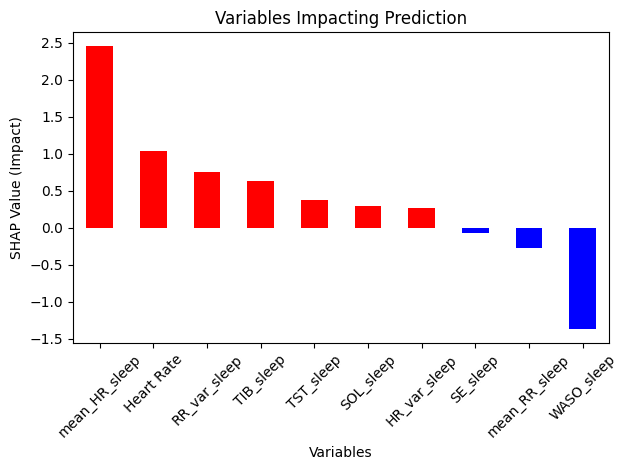

In [135]:
# For binary classification, SHAP returns the values for the positive class only in shap_values[0]
# If model is LightGBM and binary classification, you may get SHAP values for one class in a list

# Check if the SHAP values are in the expected format (list with one element)
if isinstance(shap_values, list):
    shap_values_single = shap_values[0]  # shap_values[0] will contain the actual SHAP values for binary classification
else:
    shap_values_single = shap_values

# Create a DataFrame for SHAP values
feature_names = X_test.columns
shap_df = pd.DataFrame({
    'feature': feature_names,
    'shap_value': shap_values_single[0]  # Assuming shap_values_single is correctly formatted for single instance
})
shap_df['abs_shap_value'] = shap_df['shap_value'].abs()
top_features = shap_df.sort_values(by='shap_value', ascending=False)

print(prediction)

# Generate textual explanation
intro = "The following 3 variables most significantly influenced the prediction:"
details = []
for idx, row in top_features.iterrows():
    details.append(f"{idx + 1}. {row['feature']} with an impact value of {row['shap_value']:.3f}")
explanation = f"{intro}\n" + "\n".join(details)
print(explanation)

# Plotting
colors = ['red' if x > 0 else 'blue' for x in top_features['shap_value']]
plt.figure(figsize=(8, 4))
top_features.plot.bar(x='feature', y='shap_value', legend=False, color=colors)
plt.title('Variables Impacting Prediction')
plt.xlabel('Variables')
plt.ylabel('SHAP Value (Impact)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

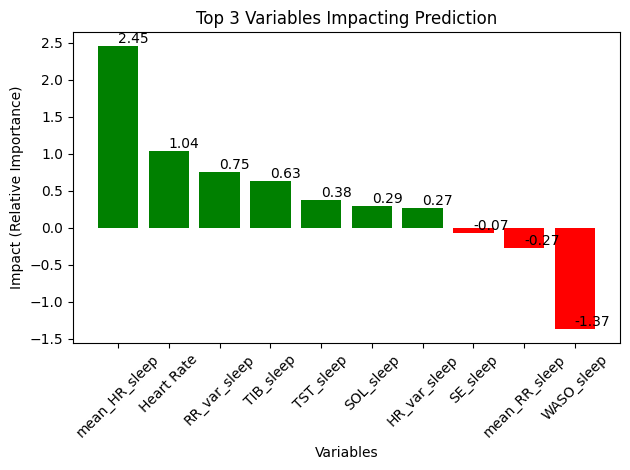

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_features' is your DataFrame with the top features and their SHAP values
features = top_features['feature']
impacts = top_features['shap_value']

colors = ['green' if x > 0 else 'red' for x in impacts]  # Green for positive, red for negative
fig, ax = plt.subplots()
bars = ax.bar(features, impacts, color=colors)

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

ax.set_title('Top 3 Variables Impacting Prediction')
ax.set_xlabel('Variables')
ax.set_ylabel('Impact (Relative Importance)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [137]:
top_features

,feature,shap_value,abs_shap_value
0,mean_HR_sleep,2.449665,2.449665
9,Heart Rate,1.036343,1.036343
3,RR_var_sleep,0.751956,0.751956
6,TIB_sleep,0.625578,0.625578
7,TST_sleep,0.375135,0.375135
5,SOL_sleep,0.294359,0.294359
1,HR_var_sleep,0.271471,0.271471
8,SE_sleep,-0.066533,0.066533
2,mean_RR_sleep,-0.271732,0.271732
4,WASO_sleep,-1.365230,1.365230


In [138]:
top_features_new = top_features.head(3)
top_features_new.loc[len(top_features.index)] = ['Other', sum(top_features['shap_value'][3:]), sum(top_features['abs_shap_value'][3:])]
top_features_new

C:\Users\youss\AppData\Local\Temp\ipykernel_26884\2689151352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features_new.loc[len(top_features.index)] = ['Other', sum(top_features['shap_value'][3:]), sum(top_features['abs_shap_value'][3:])]


,feature,shap_value,abs_shap_value
0,mean_HR_sleep,2.449665,2.449665
9,Heart Rate,1.036343,1.036343
3,RR_var_sleep,0.751956,0.751956
10,Other,-0.136952,3.270037


C:\Users\youss\AppData\Local\Temp\ipykernel_26884\3903416869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features_new['relative_importance'] = top_features_new['abs_shap_value'] / total_impact * 100


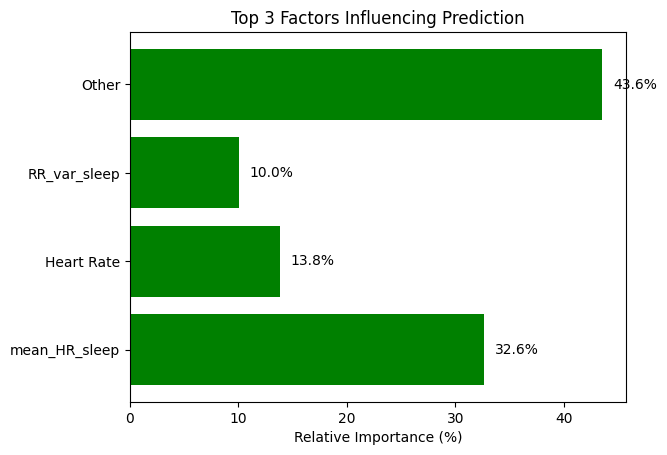

In [139]:
import matplotlib.pyplot as plt

# Assume 'top_features' contains the top features and their SHAP values
total_impact = top_features_new['abs_shap_value'].sum()
top_features_new['relative_importance'] = top_features_new['abs_shap_value'] / total_impact * 100

# Sorting features by importance for better visual layout
top_features = top_features_new.sort_values(by='relative_importance', ascending=True)

# Creating the plot
fig, ax = plt.subplots()
bars = ax.barh(top_features_new['feature'], top_features_new['relative_importance'], color='green')
ax.set_xlabel('Relative Importance (%)')
ax.set_title('Top 3 Factors Influencing Prediction')

# Adding the data labels inside the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 1  # shift the text to the right side of the bar
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

plt.show()

<Figure size 800x800 with 0 Axes>

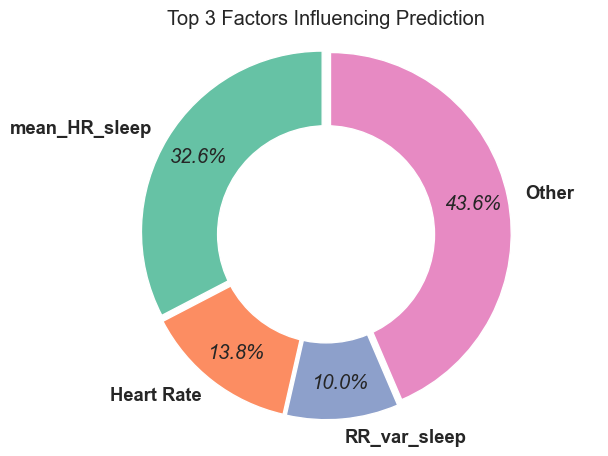

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

labels = top_features_new['feature']
sizes = top_features_new['relative_importance']
# colors = ['darkblue', 'mediumblue', 'dodgerblue','black']  # Different shades of green for visual appeal

# Create a pie chart with a hole in the middle (donut chart)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, 
                                  labels=labels, 
                                  autopct='%0.1f%%', 
                                  startangle=90, 
                                  pctdistance=0.80,
                                  explode=[0.025, 0.025, 0.025, 0.025],
                                  colors=sns.color_palette('Set2'))

# Add a circle at the center to create a donut-like chart
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)

for text in texts:
    text.set_fontweight('bold')
    # text.set_horizontalalignment('center')
 
# Customize percent labels
for autotext in autotexts:
    # autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 3 Factors Influencing Prediction')
plt.tight_layout()
plt.show()

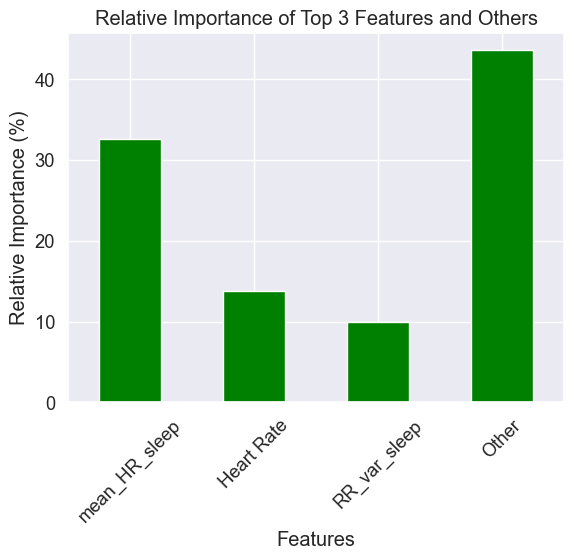

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots()
top_features_new.plot(kind='bar', x='feature', y='relative_importance', legend=False, ax=ax, color='green')
ax.set_title('Relative Importance of Top 3 Features and Others')
ax.set_xlabel('Features')
ax.set_ylabel('Relative Importance (%)')
plt.xticks(rotation=45)
plt.show()